# I_MR chart

The data should be organised in the following format

- column 1: sample lables
- column 2: individual samples
- no more columns should be present in the dataset

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv('control_chart_data.csv')

In [15]:
def i_mr_control_chart(data, ylabel = ' ' ):
    subgroup_size = len(data.columns)-1
    if subgroup_size >1:
        print('Warning: more than 1 sample in subgroups - charts are based on first column only')
        
    # move labels column to index
    data.index = data.iloc[:, 0]
    data = data.iloc[:, 1:2]
    
    # Calculate moving range
    data['mr'] = (data.iloc[:, 0].shift() - data.iloc[:, 0]).abs()
    
    # MR chart statistics
    # Calculate average range
    average_mr = data['mr'].mean()
    average = data.iloc[:,0].mean()

    # control chart constants (for n=2 as moving averages is considering 2 samples)
    e_two = 2.66
    d_four = 3.267

    # Calculate the moving range chart upper control limit.
    mr_chart_upper_control_limit = d_four * average_mr

    # Calculate the moving range chart lower control limit.
    mr_chart_lower_control_limit = 0 * average_mr
    
    # I chart statistics
    # Calculate the averages chart upper control limit.
    i_chart_upper_control_limit = average + (e_two * average_mr)

    # Calculate the averages chart lower control limit.
    i_chart_lower_control_limit = average - (e_two * average_mr)
    
    # Create a graph of "I values v. sample".
    plt.figure(figsize = (14,4))
    plt.plot(data.iloc[:, 0:1], marker='o', markersize=5, color='black')
    plt.xticks(data.index)
    plt.axhline(y=average, color='green')
    plt.axhline(y=i_chart_upper_control_limit, ls = '--', color='r')
    plt.axhline(y=i_chart_lower_control_limit, ls = '--', color='r')

    # Add the chart title and subtitle.
    plt.title('IndividualControl Chart')
    # Add the Y axis label.
    plt.ylabel(ylabel)
    plt.show()


    # Average Control chart statistics
    print('Upper control limit',
          np.round(i_chart_upper_control_limit, 2),
          sep=' = ')
    print('Average',
          np.round(average, 2),
          sep=' = ')
    print('Lower control limit',
          np.round(i_chart_lower_control_limit, 2),
          sep=' = ')

    # Create a graph of "moving range values v. sample".
    plt.figure(figsize = (14,4))
    plt.plot(data.iloc[:, 1:2], marker='o', markersize=5, color='black')
    plt.xticks(data.index)
    plt.axhline(y=average_mr, color='green')
    plt.axhline(y=mr_chart_upper_control_limit, ls = '--', color='r')
    plt.axhline(y=mr_chart_lower_control_limit, ls = '--', color='r')


    # Add the chart title and subtitle.
    plt.title('Moving Range Control Chart')
    # Add the Y axis label.
    plt.ylabel(ylabel + ' Moving Range')
    plt.show()

    # Average range chart statistics
    print('Upper control limit',
          np.round(mr_chart_upper_control_limit, 2),
          sep=' = ')
    print('Average moving range',
          np.round(average_mr, 2),
          sep=' = ')
    print('Lower control limit',
          np.round(mr_chart_lower_control_limit, 2),
          sep=' = ')

    print('___________________________________________')

    # Warnings

    # Find points outside control limits
    points_over_ucl = data.loc[((data.iloc[:, 0]) > i_chart_upper_control_limit), :]
    points_under_lcl = data.loc[((data.iloc[:, 0]) < i_chart_lower_control_limit), :]
    out_of_control_points = len(points_over_ucl) + len(points_under_lcl)

    total_data_points = len(data)

    print( f'Number of out-of-control points on Xbar chart: {out_of_control_points}')
    print('If the data are correlated, you may see an increased number of false alarms.')

    if total_data_points <100:
        print(""" 
        Warning: You may not have enough data to estimate precise control limits.
        At least 100 data points should be included in the calculations.
        """)

    if (out_of_control_points/total_data_points) > 0.05:
        print(f"""
        Warning: Evaluate the % of out-of-control subgroups  
        ({np.round(out_of_control_points/total_data_points, 2)}) subgroup is out of control on the Xbar chart
        (You may see 0.7% out-of-control subgroups on the Xbar chart 
        and 0.3% out-of-control subgroups on the S chart by chance, 
        even when the process is stable)
        """)

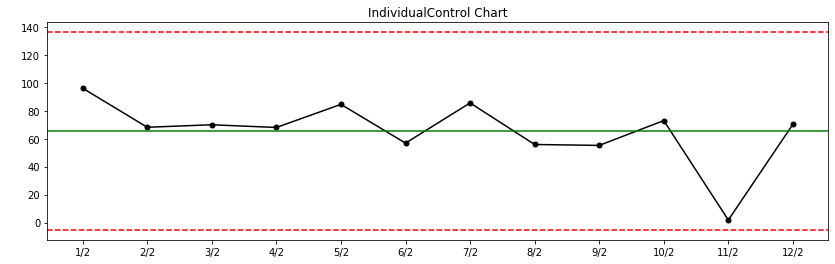

Upper control limit = 136.13
Average = 65.44
Lower control limit = -5.24


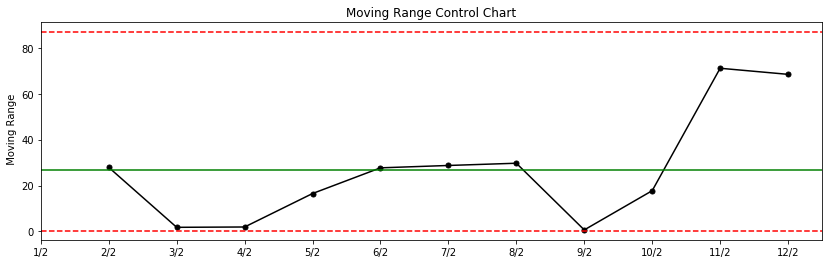

Upper control limit = 86.81
Average moving range = 26.57
Lower control limit = 0.0
___________________________________________
Number of out-of-control points on Xbar chart: 0
If the data are correlated, you may see an increased number of false alarms.
 
        At least 100 data points should be included in the calculations.
        


In [16]:
i_mr_control_chart(data)